# Data Exploration

## Preliminaries:  load libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import nonparametric_stats as nps
import sys
import re

## Import data into Pandas dataframe

In [5]:
dataFilePath = './data/online_shoppers_intention.csv'
shopIntent_df = pd.read_csv(dataFilePath, header=0, delimiter=',')
featureNames = shopIntent_df.columns.values

## Inspect resultant dataframe

In [6]:
shopIntent_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [7]:
type(shopIntent_df['Month'].values[0])

str

In [8]:
type(shopIntent_df['Weekend'].values[0])

numpy.bool_

In [9]:
np.unique(shopIntent_df['ProductRelated'].values)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
np.unique(shopIntent_df['OperatingSystems'].values)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
np.unique(shopIntent_df['Browser'].values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [12]:
feature_diversity = {c: np.unique(shopIntent_df[c].values) for c in shopIntent_df.columns.values}
feature_diversity['TrafficType']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [13]:
shopIntent_df.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype=object)

### Use Bayes' Formula to calulate probability of a "hit" given a particular categorical value of a feature 

In [102]:
p_Hit = np.sum(shopIntent_df['Revenue'].values) / shopIntent_df['Revenue'].values.shape[0]
p_Miss = np.sum(~shopIntent_df['Revenue'].values) / shopIntent_df['Revenue'].values.shape[0]
p_OS = {f:np.sum(shopIntent_df['OperatingSystems'].values == f) / shopIntent_df['OperatingSystems'].values.shape[0]
        for f in feature_diversity['OperatingSystems']}
p_OS_given_Hit = {f:np.sum(shopIntent_df['Revenue'].values[
    shopIntent_df['OperatingSystems'].values == f])/np.sum(shopIntent_df['Revenue'].values)
          for f in feature_diversity['OperatingSystems']}

p_OS_given_Miss = {f:np.sum(~shopIntent_df['Revenue'].values[
    shopIntent_df['OperatingSystems'].values == f])/np.sum(~shopIntent_df['Revenue'].values)
          for f in feature_diversity['OperatingSystems']}

p_Hit_given_OS = {os: p_OS_given_Hit[os] * p_Hit / p_OS[os] 
                  for os in feature_diversity['OperatingSystems']}

p_OS_by_Sum = {os: p_OS_given_Hit[os]*p_Hit + p_OS_given_Miss[os]*p_Miss 
               for os in feature_diversity['OperatingSystems']}

# Just verifying the "shortcut" for the denominator here...
print(p_OS)
print(p_OS_by_Sum)


{1: 0.20965125709651258, 2: 0.535360908353609, 3: 0.20721816707218166, 4: 0.03876723438767234, 5: 0.00048661800486618007, 6: 0.0015409570154095702, 7: 0.0005677210056772101, 8: 0.006407137064071371}
{1: 0.20965125709651258, 2: 0.535360908353609, 3: 0.20721816707218169, 4: 0.03876723438767235, 5: 0.00048661800486618007, 6: 0.0015409570154095702, 7: 0.0005677210056772101, 8: 0.00640713706407137}


In [123]:
p_Hit_given_OS

{1: 0.14661508704061893,
 2: 0.17497348886532343,
 3: 0.10489236790606654,
 4: 0.17782426778242677,
 5: 0.16666666666666666,
 6: 0.10526315789473684,
 7: 0.14285714285714285,
 8: 0.21518987341772147}

### Generalize above into modular function so that we can investigate other features this way

In [15]:
def BayesHitProbByCatFeat(binTargs, featureVec, valuesSet):
    
    p_Hit = np.sum(binTargs) / binTargs.shape[0]
    
    p_Val = {v:np.sum(featureVec == v) / featureVec.shape[0] 
             for v in valuesSet}
    
    p_Val_given_Hit = {v:np.sum(binTargs[featureVec == v]
                               )/np.sum(binTargs) 
                       for v in valuesSet}
    
    p_Hit_given_Val = {v: p_Val_given_Hit[v] * p_Hit / p_Val[v] 
                      for v in valuesSet}
    
    return p_Hit_given_Val


def BayesHitProbByCatFeat2(targsVec, featureVec, targVal, featValuesSet):
    
    p_Hit = np.sum(targsVec == targVal) / targsVec.shape[0]
    
    p_featVal = {fv:np.sum(featureVec == fv) / featureVec.shape[0] 
                 for fv in featValuesSet}
    
    p_featVal_given_Hit = {fv:np.sum(targsVec[featureVec == fv] == targVal
                               ) / np.sum(targsVec == targVal) 
                           for fv in featValuesSet}
    
    p_Hit_given_featVal = {fv: p_featVal_given_Hit[fv] * p_Hit / p_featVal[fv] 
                           for fv in featValuesSet}
    
    return p_Hit_given_featVal

### Define function to report counts of a response value across feature categories

In [16]:
def HitCountsByCatFeat(targsVec, featureVec, targVal, featValuesSet):
    
    hitCounts = {fv: np.sum(targsVec[featureVec == fv] == targVal) 
                 for fv in featValuesSet}
    return hitCounts

### Define a function to plot proportions of a response value across feature categories  

In [47]:
def PlotProportionsOfTargetsAcrossCatFeat(targsVec, featuresVec, targValSetList):
    featureValSet = np.unique(featuresVec)
    countsArray = np.array([np.array([np.sum([np.array([(targVal in targValSet) 
                                              for targVal in targsVec[featuresVec == featureVal]])])  
                                      for featureVal in featureValSet])
                            for targValSet in targValSetList])
    
    labelIndex = 0
    labels = [str(s) for s in targValSetList]
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(11, 7)
    
    for ca in countsArray:
        ax.plot(featureValSet, ca/np.sum(ca), label=labels[labelIndex])
        labelIndex += 1
    ax.set_xlabel('feature category')
    ax.set_ylabel('proportion of target responses')
    ax.legend()
    return ax

### Examine revenue probability by OS type

In [17]:
print(BayesHitProbByCatFeat(shopIntent_df['Revenue'].values, 
                      shopIntent_df['OperatingSystems'].values,
                      feature_diversity['OperatingSystems']))

osRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                             shopIntent_df['OperatingSystems'].values,
                             True,
                             feature_diversity['OperatingSystems'])
print(osRevProbs)


{1: 0.14661508704061893, 2: 0.17497348886532343, 3: 0.10489236790606654, 4: 0.17782426778242677, 5: 0.16666666666666666, 6: 0.10526315789473684, 7: 0.14285714285714285, 8: 0.21518987341772147}
{1: 0.14661508704061893, 2: 0.17497348886532343, 3: 0.10489236790606654, 4: 0.17782426778242677, 5: 0.16666666666666666, 6: 0.10526315789473684, 7: 0.14285714285714285, 8: 0.21518987341772147}


Text(0.5, 1.0, 'Proportion of Target values across OperatingSystems categories')

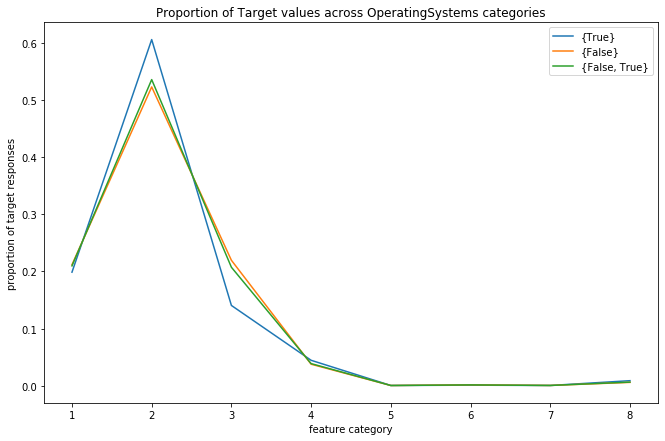

In [48]:
ax = PlotProportionsOfTargetsAcrossCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['OperatingSystems'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across OperatingSystems categories')

Proportion of Revenue-producing events increased and decreased compared to non-Revenue-producing and total events for Operating system types 2 and 3 respectively.

### Revenue probability by browser type

In [140]:
browserRevHitProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Browser'].values,
                       True,
                       feature_diversity['Browser'])
browserRevHitProbs

{1: 0.14825345247766042,
 2: 0.15362391659339278,
 3: 0.04761904761904762,
 4: 0.17663043478260868,
 5: 0.1841541755888651,
 6: 0.11494252873563218,
 7: 0.12244897959183675,
 8: 0.15555555555555553,
 9: 0.0,
 10: 0.19631901840490798,
 11: 0.16666666666666666,
 12: 0.3,
 13: 0.26229508196721313}

Browser types 9 and 3 appear have small or zero hit probabilities. Types 12 and 13 have comparatively high Revenue probabilities.

Text(0.5, 1.0, 'Proportion of Target values across Browser categories')

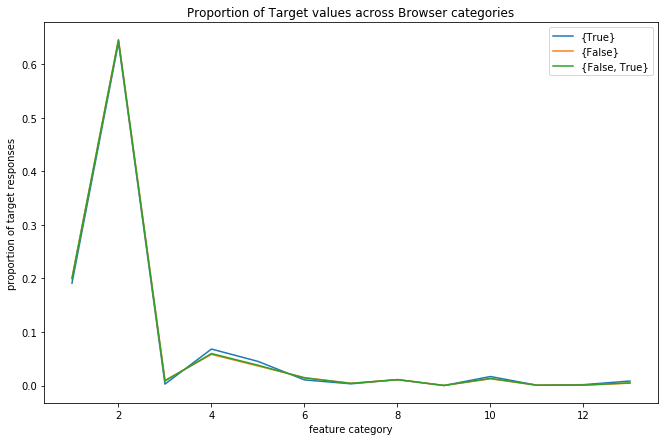

In [49]:
ax = PlotProportionsOfTargetsAcrossCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Browser'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Browser categories')

Proportions of hits and misses are equivalent across Browser type categories.

### Revenue probability by Region

In [96]:
BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Region'].values,
                       True,
                       feature_diversity['Region'])

{1: 0.1612970711297071,
 2: 0.16549295774647887,
 3: 0.14523512276321263,
 4: 0.14805414551607446,
 5: 0.16352201257861634,
 6: 0.1391304347826087,
 7: 0.15637319316688567,
 8: 0.12903225806451615,
 9: 0.16829745596868884}

Hit probabilities across different regions appear roughly equal. 

Text(0.5, 1.0, 'Proportion of Target values across Region categories')

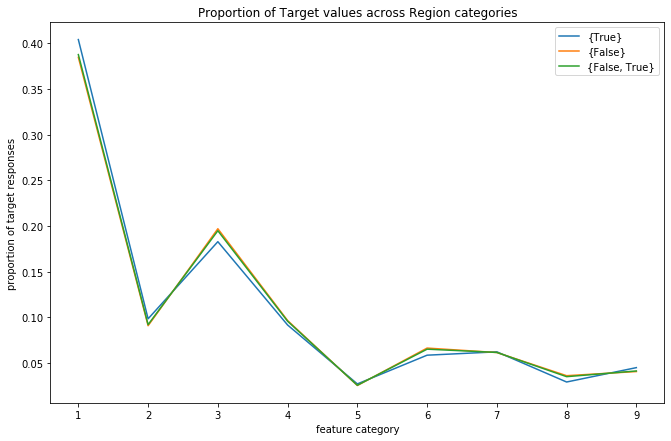

In [50]:
ax = PlotProportionsOfTargetsAcrossCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Region'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Region categories')

Target value proportions do not appreciably differ across region categories either.

The Region feature by itself does not appear to be strong predictor of Revenue hits. I will likely not include this feature in the model to reduce potential over-fitting.

### Revenue probability by ProductRelated ID

In [35]:
prodRelRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['ProductRelated'].values,
                       True,
                       feature_diversity['ProductRelated'])
prodRelRevProbs

{0: 0.15789473684210525,
 1: 0.02090032154340836,
 2: 0.04301075268817204,
 3: 0.05458515283842795,
 4: 0.04455445544554455,
 5: 0.05235602094240838,
 6: 0.06060606060606061,
 7: 0.08951406649616368,
 8: 0.11351351351351349,
 9: 0.10725552050473183,
 10: 0.15151515151515152,
 11: 0.11688311688311687,
 12: 0.12779552715654954,
 13: 0.15570934256055366,
 14: 0.1713147410358566,
 15: 0.14814814814814814,
 16: 0.14615384615384613,
 17: 0.17699115044247787,
 18: 0.145,
 19: 0.19266055045871558,
 20: 0.17333333333333334,
 21: 0.2110552763819095,
 22: 0.20657276995305165,
 23: 0.18333333333333335,
 24: 0.18229166666666666,
 25: 0.14285714285714285,
 26: 0.18709677419354837,
 27: 0.20338983050847456,
 28: 0.20138888888888887,
 29: 0.2074074074074074,
 30: 0.2605633802816902,
 31: 0.20312499999999997,
 32: 0.29411764705882354,
 33: 0.19834710743801656,
 34: 0.20388349514563103,
 35: 0.1881188118811881,
 36: 0.11818181818181817,
 37: 0.22033898305084743,
 38: 0.19101123595505615,
 39: 0.17431192

It is important to notice that ProductRelated values run continuously in the low end, but are increasingly missing in the high end. Strongly suspect that products with high-valued ProductRelated IDs are purchased less often as hit probabilities are increasingly striated (i.e. taking on values of 1/3, 1/2, 1, and 0) as ProductMethod ID values increase.  Need to look at counts across ProductMethod ID values.

In [36]:
prodRelHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['ProductRelated'].values,
                                      True,
                                      feature_diversity['ProductRelated'])

Text(0.5, 1.0, 'Proportion of Target values across ProjectRelated categories')

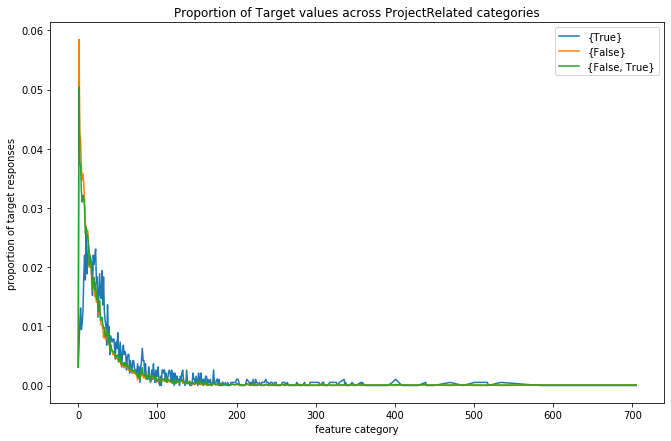

In [51]:
ax = PlotProportionsOfTargetsAcrossCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['ProductRelated'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across ProjectRelated categories')

ProductRelated id categories are *NOT* uniformly distributed in this dataset.

Shift of `Revenue == True` distribution (blue line) compared to `Revenue == False` (orange line) and total Revenue (green) distributions should reveal in some target-specific separation of datapoints along this dimension in a scatter plot. Hopefully, there will be enough separation to permit dimensionality reduction via k-means, etc.  Let's keep our fingers crossed because, otherwise, the 700+ distinct categories without DR would be a bear to try and fit any classification model around.

### Plot correlation scatter of revenue probability over median duration for each category of ProductRelated

In [38]:
def MedianDurationByCatFeat(dursVec, featureVec, featValuesSet):
    return {fv: np.median(dursVec[featureVec == fv]) for fv in featValuesSet}

(-500, 10000.0)

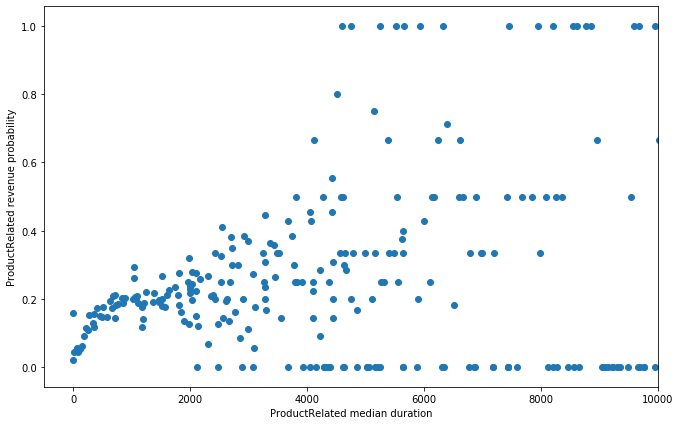

In [39]:
prodRelMedDurs = MedianDurationByCatFeat(shopIntent_df['ProductRelated_Duration'].values, 
                                       shopIntent_df['ProductRelated'].values,
                                       feature_diversity['ProductRelated'])

fig2, ax2 = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(11,7)
xVec = np.array([prodRelMedDurs[kv] for kv in feature_diversity['ProductRelated']])
yVec = np.array([prodRelRevProbs[kv] for kv in feature_diversity['ProductRelated']])
ax2.scatter(xVec, yVec)
ax2.set_ylabel('ProductRelated revenue probability')
ax2.set_xlabel('ProductRelated median duration')
ax2.set_xlim([-500,1e4])

Revenue probability correlates positively with the median duration of shoppers view time of Product related pages.  Each datapoint here corresponds with a particular category of the ProductRelated feature. The correlation loosens with inceasing median duration however. Again, notice the striations in revenue probability due to the sparse sampling of uncommon products.

### Revenue probability by Administrative category

In [40]:
adminRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Administrative'].values, 
                       True,
                       feature_diversity['Administrative'])
adminRevProbs

{0: 0.08911234396671289,
 1: 0.21491875923190545,
 2: 0.18402154398563733,
 3: 0.19016393442622948,
 4: 0.19999999999999998,
 5: 0.20521739130434782,
 6: 0.2569444444444444,
 7: 0.19526627218934908,
 8: 0.2543554006968641,
 9: 0.27111111111111114,
 10: 0.20915032679738563,
 11: 0.2952380952380952,
 12: 0.24418604651162787,
 13: 0.33928571428571425,
 14: 0.27272727272727276,
 15: 0.21052631578947367,
 16: 0.3333333333333333,
 17: 0.25,
 18: 0.16666666666666666,
 19: 0.16666666666666666,
 20: 0.5,
 21: 0.0,
 22: 0.5,
 23: 0.0,
 24: 0.0,
 26: 1.0,
 27: 0.0}

Notice that Administrative ID value 25 is missing here.  How many different Administrative ID values are there in the population? Do IDs range from  0 through 27, or do they go beyond 27?  It appears that 25 is missing in this dataset simply because site vistors did not navigate to it.  Could that be the case for possibe IDs greater than 27 as well?  Best course here would be to seek answers from the site developers.

Text(0.5, 1.0, 'Proportion of Target values across Administrative categories')

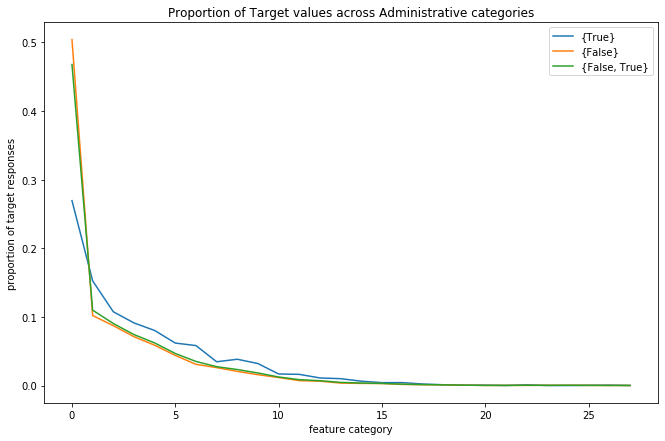

In [52]:
ax = PlotProportionsOfTargetsAcrossCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Administrative'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Administrative categories')

Administrative categories are also *NOT* uniformly distributed in dataset.  It appears that Admin IDs were assigned in order of frequency visited: most frequent getting lowest-valued ID number.

As was the case for both `ProductRelated` and `Administrative` variables, there is a shift in proportion for `Revenue == True` cases compared to the other two for low-valued ID numbers of `Informational`.

The proportions appear to be exponentially distributed.  Consider transforming these values of the feature (likely page ranks) into ones that are more symmetrically distributed in the new space.

In [126]:
def expPdfInv(xArray):
    xArray = xArray + np.ones_like(xArray)
    mu_x = np.mean(xArray)
    return -mu_x*np.log(mu_x*xArray)
 

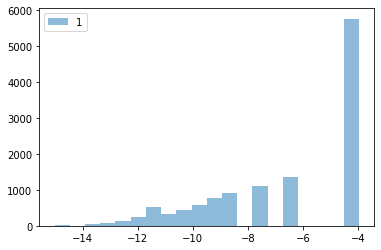

In [132]:
xFormedVals = expPdfInv(shopIntent_df['Administrative'].values)
nps.histPlotter(20, xFormedVals)

Mean of transformed values: 0.5334456114980967
Median of transformed values: 0.5828703952621335


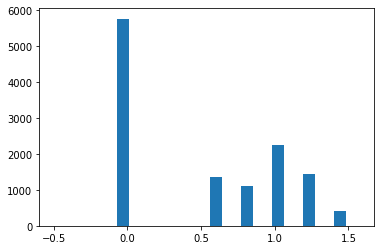

In [157]:
from  scipy.stats import boxcox
xFormedVals = boxcox(shopIntent_df['Administrative'].values + 1)
plt.hist(xFormedVals)
xFormedVals[0]
print('Mean of transformed values: {}'.format(np.mean(xFormedVals[0])))
print('Median of transformed values: {}'.format(np.median(xFormedVals[0])))

Text(0.5, 0, 'Administrative median duration')

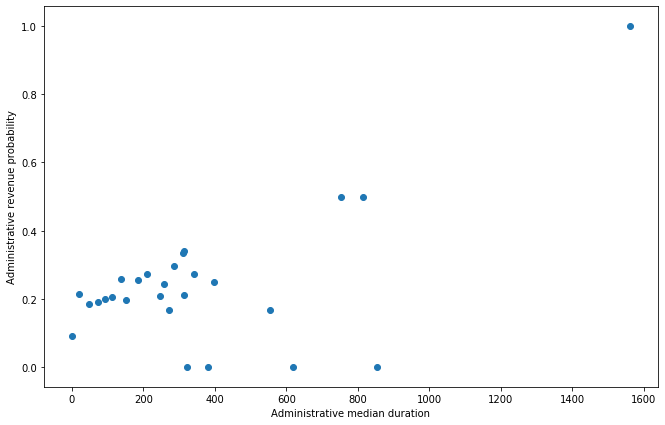

In [43]:
adminMedDurs = MedianDurationByCatFeat(shopIntent_df['Administrative_Duration'].values, 
                                       shopIntent_df['Administrative'].values,
                                       feature_diversity['Administrative'])

fig6, ax6 = plt.subplots(nrows=1, ncols=1)
fig6.set_size_inches(11,7)
xVec = np.array([adminMedDurs[kv] for kv in feature_diversity['Administrative']])
yVec = np.array([adminRevProbs[kv] for kv in feature_diversity['Administrative']])
ax6.scatter(xVec, yVec)
ax6.set_ylabel('Administrative revenue probability')
ax6.set_xlabel('Administrative median duration')

Revenue probability correlates roughly positively with median duration across administrative categories.

### Revenue probability by Informational category

In [44]:
infoRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Informational'].values, 
                       True,
                       feature_diversity['Informational'])
infoRevProbs

{0: 0.13351891947623465,
 1: 0.22670509125840538,
 2: 0.21153846153846156,
 3: 0.24473684210526317,
 4: 0.27927927927927926,
 5: 0.3131313131313131,
 6: 0.2179487179487179,
 7: 0.16666666666666669,
 8: 0.2857142857142857,
 9: 0.4,
 10: 0.2857142857142857,
 11: 0.0,
 12: 0.39999999999999997,
 13: 0.0,
 14: 0.0,
 16: 0.0,
 24: 0.0}

Same issue here as with ProductRelated and Administrative features; certain categories appear to be missing for some reason.

Text(0.5, 1.0, 'Proportion of Target values across Informational categories')

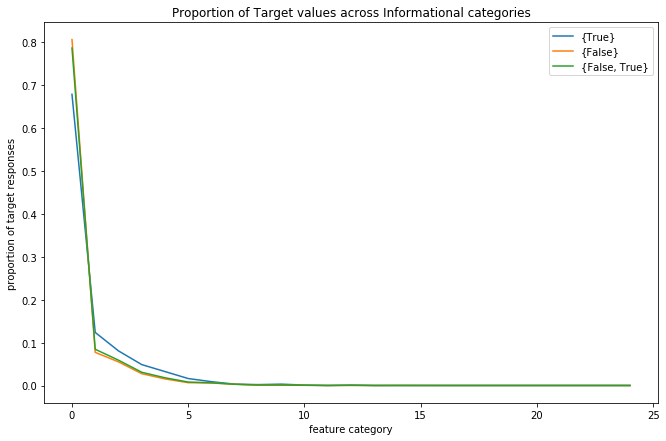

In [53]:
ax = PlotProportionsOfTargetsAcrossCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Informational'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Informational categories')

Text(0.5, 0, 'Info median duration')

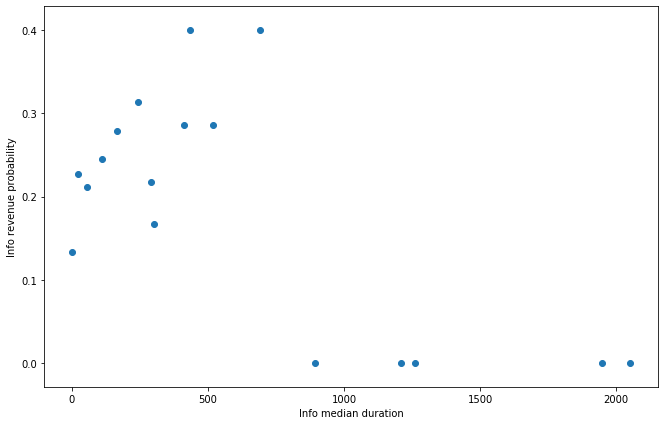

In [54]:
infoMedDurs = MedianDurationByCatFeat(shopIntent_df['Informational_Duration'].values, 
                                       shopIntent_df['Informational'].values,
                                       feature_diversity['Informational'])

fig6, ax6 = plt.subplots(nrows=1, ncols=1)
fig6.set_size_inches(11,7)
xVec = np.array([infoMedDurs[kv] for kv in feature_diversity['Informational']])
yVec = np.array([infoRevProbs[kv] for kv in feature_diversity['Informational']])
ax6.scatter(xVec, yVec)
ax6.set_ylabel('Info revenue probability')
ax6.set_xlabel('Info median duration')

Revenue probability correlates roughly positively with median duration across Informational categories.  However, 5 categories had zero revenue probability despite having the longest median view times.

I'm considering not including `Informational`, and `Informational_Duration` as features of the model. They do not appear to have an easily understandable relationship with revenue production. 

### Generate 3D scatter of Administrative, Informational and ProductRelated numeric categories

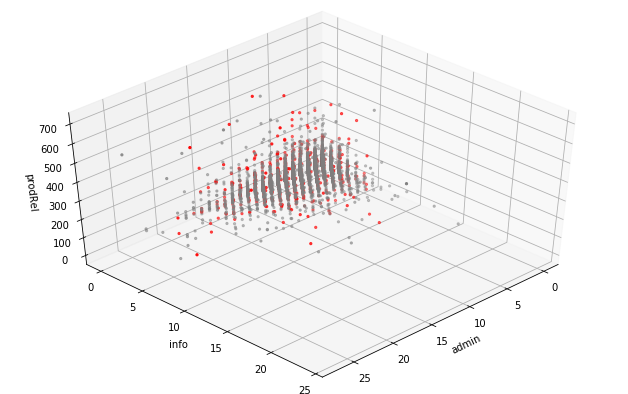

In [84]:
import mpl_toolkits.mplot3d

revTrueMask = shopIntent_df['Revenue'].values == True
revMaskSet = [revTrueMask, ~revTrueMask]
markerSet = ['.','.']
colorSet = ['red', 'gray']

fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot(projection="3d")

for i in [1, 0]:
    
    ax.scatter(shopIntent_df['Administrative'].iloc[revMaskSet[i]].values,
               shopIntent_df['Informational'].iloc[revMaskSet[i]].values,
               shopIntent_df['ProductRelated'].iloc[revMaskSet[i]].values, 
               marker=markerSet[i], color=colorSet[i])
    
ax.set_xlabel('admin')
ax.set_ylabel('info')
ax.set_zlabel('prodRel')

# rotate the axes and update
ax.view_init(45, 45)
plt.draw()

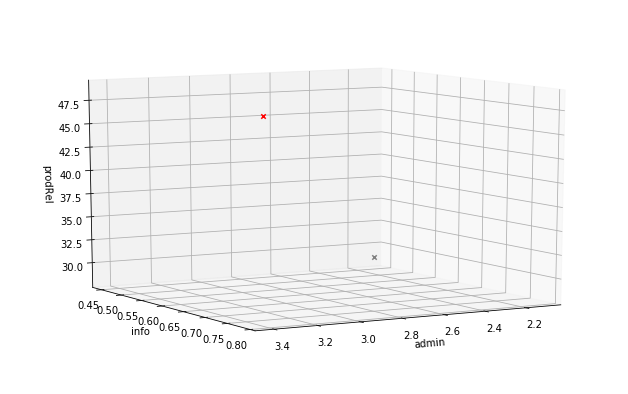

In [94]:
markerSet = ['x','x']
colorSet = ['red', 'gray']

fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot(projection="3d")

for i in [1, 0]:
    
    ax.scatter(np.mean(shopIntent_df['Administrative'].iloc[revMaskSet[i]].values),
               np.mean(shopIntent_df['Informational'].iloc[revMaskSet[i]].values),
               np.mean(shopIntent_df['ProductRelated'].iloc[revMaskSet[i]].values), 
               marker=markerSet[i], color=colorSet[i])
    
ax.set_xlabel('admin')
ax.set_ylabel('info')
ax.set_zlabel('prodRel')

# rotate the axes and update
ax.view_init(10, 60)
plt.draw()

### Investigate revenue probability by month

In [98]:
monthRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Month'].values, 
                       True,
                       feature_diversity['Month'])
monthRevProbs

{'Aug': 0.17551963048498845,
 'Dec': 0.1250723798494499,
 'Feb': 0.01630434782608696,
 'Jul': 0.15277777777777776,
 'June': 0.10069444444444443,
 'Mar': 0.10068169900367069,
 'May': 0.10850178359096313,
 'Nov': 0.2535023348899266,
 'Oct': 0.20947176684881602,
 'Sep': 0.1919642857142857}

Months of January and April are missing. Is this because none of the visitors purchased items during these months? No.  There are no January or April events in the dataset.  Perhaps the site was not offering the items on those months.

Convert months to numerical values and plot probabilities in ordered time sequence to see if there are seasonal trends

Text(0, 0.5, 'revenue probability')

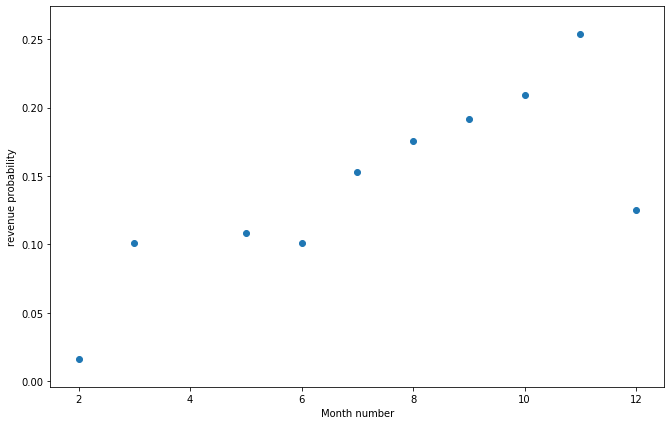

In [101]:
monthConv = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

xVec = np.array([monthConv[k] for k in monthRevProbs.keys()])
yVec = np.array([monthRevProbs[k] for k in monthRevProbs.keys()])

fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
ax.scatter(xVec, yVec, marker='o')
ax.set_xlabel('Month number')
ax.set_ylabel('revenue probability')

July through November showed monotonic increase in purchases.

### Revenue probability by SpecialDay categories

In [103]:
feature_diversity['SpecialDay']

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [104]:
spDayRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['SpecialDay'].values, 
                       True,
                       feature_diversity['SpecialDay'])
spDayRevProbs

{0.0: 0.16526762343171766,
 0.2: 0.07865168539325844,
 0.4: 0.053497942386831275,
 0.6: 0.08262108262108261,
 0.8: 0.033846153846153845,
 1.0: 0.06493506493506493}

### Revenue probability by Weekend categories

In [105]:
weekendRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Weekend'].values, 
                       True,
                       feature_diversity['Weekend'])
weekendRevProbs

{False: 0.14891143521454236, True: 0.1739888423988842}

In [163]:
weekendConv = {True: 1, False: 0}
weekendConv[True]

1

### Revenue probability by TrafficType categories

In [106]:
trafTypeRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['TrafficType'].values, 
                       True,
                       feature_diversity['TrafficType'])
trafTypeRevProbs

{1: 0.10689514483884129,
 2: 0.2164579606440071,
 3: 0.08771929824561404,
 4: 0.15434985968194576,
 5: 0.2153846153846154,
 6: 0.11936936936936936,
 7: 0.3,
 8: 0.27696793002915454,
 9: 0.09523809523809523,
 10: 0.20000000000000004,
 11: 0.1902834008097166,
 12: 0.0,
 13: 0.058265582655826556,
 14: 0.15384615384615385,
 15: 0.0,
 16: 0.3333333333333333,
 17: 0.0,
 18: 0.0,
 19: 0.058823529411764705,
 20: 0.2525252525252525}

Traffic types 16, 7 and 8 were most likely to produce revenue.

### Revenue probability by Visitor categories

In [122]:
visitorProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['VisitorType'].values, 
                       True,
                       feature_diversity['VisitorType'])
visitorProbs

{'New_Visitor': 0.24911452184179456,
 'Other': 0.18823529411764706,
 'Returning_Visitor': 0.13932328689223772}

In [167]:
visitorConv = {'New_Visitor':  0, 'Returning_Visitor': 1, 'Other': 2}
visitorConv['Returning_Visitor']

1

New visitors were the most likely of the three types to make a purchase.

### Compare BounceRates

In [112]:
feature_diversity['BounceRates'].shape

(1872,)

Text(0, 0.5, 'Bounce rate')

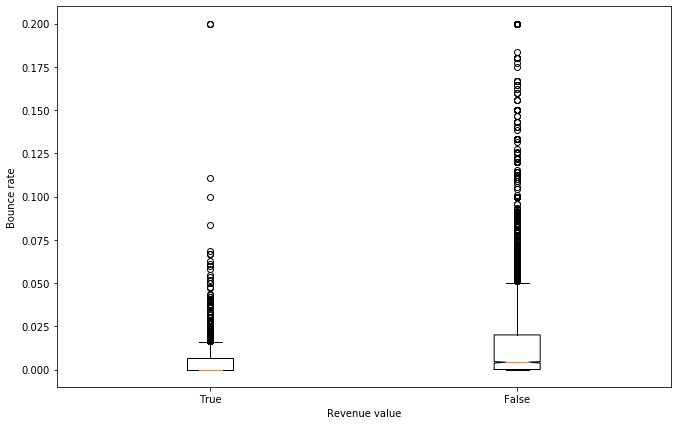

In [119]:
fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
xlabels = ['True', 'False']
ax.boxplot([shopIntent_df['BounceRates'].iloc[revMaskSet[i]].values for i in [0,1]], 
           notch=True, bootstrap=1000, labels=xlabels)
ax.set_xlabel('Revenue value')
ax.set_ylabel('Bounce rate')

Median bounce rate was significantly greater for non-revenue-producing transactions.  Bounce rates of non-buys comprised a broader distribution than bounce rates of purchasers.

### Compare ExitRates

Text(0, 0.5, 'Exit rate')

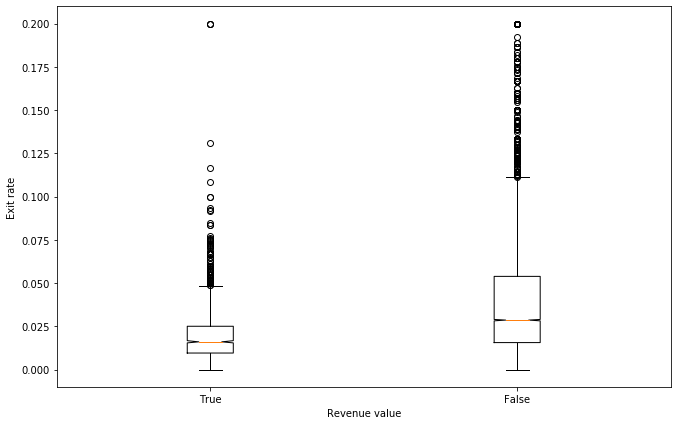

In [120]:
fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
xlabels = ['True', 'False']
ax.boxplot([shopIntent_df['ExitRates'].iloc[revMaskSet[i]].values for i in [0,1]], 
           notch=True, bootstrap=1000, labels=xlabels)
ax.set_xlabel('Revenue value')
ax.set_ylabel('Exit rate')

Revenue producing transactions had significanly reduced median exit rates.

### Compare PageValues

Text(0, 0.5, 'Page value')

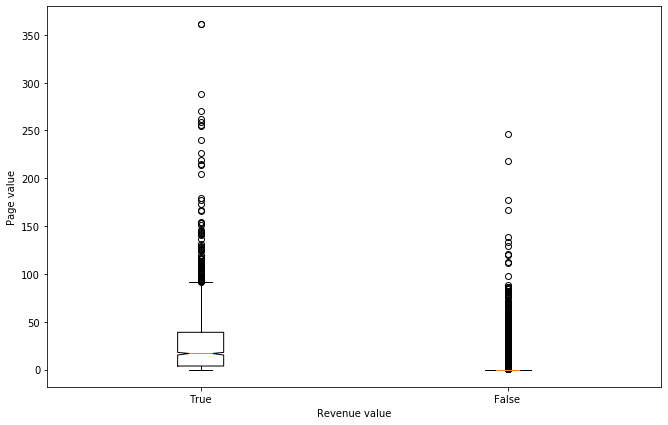

In [121]:
fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
xlabels = ['True', 'False']
ax.boxplot([shopIntent_df['PageValues'].iloc[revMaskSet[i]].values for i in [0,1]], 
           notch=True, bootstrap=1000, labels=xlabels)
ax.set_xlabel('Revenue value')
ax.set_ylabel('Page value')

Revenue producing transactions had significantly greater median page values

# Value conversion 

Planning on starting with SVM-based model that can only take numerically-valued features.  Accordingly, we need to convert features that have text labels as values.  Conversion dicts for each were defined above.

In [188]:
# Convert columns using conversion dicts
monthNumArray = np.array([monthConv[ml] for ml in shopIntent_df['Month'].values])
weekendNumArray = np.array([weekendConv[wl] for wl in shopIntent_df['Weekend'].values])
visitorNumArray = np.array([visitorConv[vl] for vl in shopIntent_df['VisitorType'].values])
revenueNumArray = shopIntent_df['Revenue'].values.astype(int)

In [189]:
# Insert numerically-converted columns into dataframe
shopIntent_df['nMonth'] = monthNumArray
shopIntent_df['nWeekend'] = weekendNumArray
shopIntent_df['nVisitorType'] = visitorNumArray
shopIntent_df['nRevenue'] = revenueNumArray

# Model setup

In [200]:
import sklearn.svm as svm
import sklearn.metrics as mt

## Specify features to include and response class

In [181]:
CompleteFeatureSpace = set(shopIntent_df.columns)
type(CompleteFeatureSpace)

set

In [207]:
ModelFeatureSet = CompleteFeatureSpace - set([
    'Revenue', 'nRevenue', 'Month', 'VisitorType', 'Weekend', 'Region'
])
ModelTarget = 'nRevenue'

ModelFeatureSet

{'Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'OperatingSystems',
 'PageValues',
 'ProductRelated',
 'ProductRelated_Duration',
 'SpecialDay',
 'TrafficType',
 'nMonth',
 'nVisitorType',
 'nWeekend'}

In [197]:
indices =  np.arange(0, shopIntent_df.shape[0])
targTrueIndices = indices[shopIntent_df[ModelTarget] == 1]
targFalseIndices = indices[shopIntent_df[ModelTarget] == 0]
print('Number of Revenue = True records: {}'.format(targTrueIndices.shape[0]))
print('Number of Revenue = False records: {}'.format(targFalseIndices.shape[0]))

Number of Revenue = True records: 1908
Number of Revenue = False records: 10422


## Generate training and testing datasets

In [217]:
# Specify proportion (0.0, 1.0) of selected records to be 
# used to train model 
trainProp = 0.7

# Generate mask to randomly select records from the collection
# of non-revenue producing transactions
selTargFalseInds = np.random.choice(targFalseIndices, 
                                    size=2*targTrueIndices.shape[0], 
                                    replace=False)
# Combine revenue and and non-revenue masks into single 
# composite list, count the total number of elements, then 
# shuffle the list.
combinedIndices = np.concatenate((targTrueIndices, selTargFalseInds), axis=0)
nSamples = combinedIndices.shape[0]
np.random.shuffle(combinedIndices)

# Split list into training and testing sets
splitIndex = int(np.ceil(trainProp*nSamples))
trainSelect = np.arange(0, splitIndex)
testSelect = np.arange(splitIndex, nSamples)
trainSetIndices = combinedIndices[trainSelect]
testSetIndices = combinedIndices[testSelect]

In [218]:
shopIntent_mod = svm.SVC(kernel='rbf', C=5.0, class_weight={1: 2.0, 0: 1.0}, probability=True)
shopIntent_mod.fit(shopIntent_df[ModelFeatureSet].iloc[trainSetIndices], 
               shopIntent_df[ModelTarget].iloc[trainSetIndices])

SVC(C=5.0, break_ties=False, cache_size=200, class_weight={0: 1.0, 1: 2.0},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Run model on test set and compute probability scores

In [219]:
preds = shopIntent_mod.predict(shopIntent_df[ModelFeatureSet].iloc[testSetIndices])
pred_probas = shopIntent_mod.predict_proba(shopIntent_df[ModelFeatureSet].iloc[testSetIndices])
pred_probas

array([[0.89219435, 0.10780565],
       [0.24646893, 0.75353107],
       [0.23801809, 0.76198191],
       ...,
       [0.6480966 , 0.3519034 ],
       [0.78420674, 0.21579326],
       [0.32709113, 0.67290887]])

## Run metrics

In [220]:
# Count total corrects
np.sum(preds == shopIntent_df[ModelTarget].iloc[testSetIndices])

1333

In [221]:
# Compile confusion matrix
mt.confusion_matrix(shopIntent_df[ModelTarget].iloc[testSetIndices], preds, labels=[1,0])

array([[419, 162],
       [222, 914]])

In [222]:
# Calculate precision
mt.precision_score(shopIntent_df[ModelTarget].iloc[testSetIndices], preds, labels=[1,0])

0.6536661466458659

In [223]:
# Calculate accuracy
mt.accuracy_score(shopIntent_df[ModelTarget].iloc[testSetIndices], preds)

0.7763541059988351

## Compute and plot Precision-Recal curve

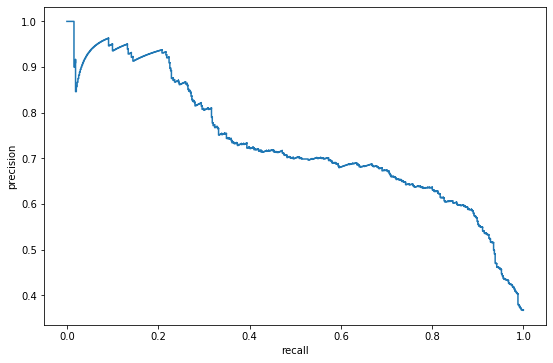

In [224]:
precCrv, recCrv, thlds = mt.precision_recall_curve(shopIntent_df[ModelTarget].iloc[testSetIndices], 
                                                    pred_probas[:,1], pos_label=1)
fig4, ax4 = plt.subplots(nrows=1, ncols=1)
fig4.set_size_inches(9, 9)
ax4.step(recCrv, precCrv)
ax4.set_xlabel('recall')
ax4.set_ylabel('precision')
ax4.set_aspect(1)